In [1]:
import pandas as pd
import numpy as np
import os
import sys
import time
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
os.getcwd()

'c:\\python_env\\datascience\\kaggle\\titanic\\notebook'

In [3]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [4]:
train_df=pd.read_csv(train_file_path, index_col='PassengerId')
test_df=pd.read_csv(test_file_path, index_col='PassengerId')

In [5]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.shape, test_df.shape

((891, 11), (418, 10))

In [8]:
type(train_df), type(test_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [11]:
test_df['Survived'] = -888

In [12]:
df = pd.concat((train_df,test_df), axis=0)

In [13]:
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1137,-888,1,"Kenyon, Mr. Frederick R",male,41.0,1,0,17464,51.8625,D21,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
1273,-888,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q
531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
1243,-888,2,"Stokes, Mr. Philip Joseph",male,25.0,0,0,F.C.C. 13540,10.5000,NaN,S
188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S


In [14]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,-888,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,-888,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,-888,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,-888,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [16]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [17]:
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


In [18]:
df.loc[5:10,]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
df.loc[5:10, 'Pclass':'Age']

,Pclass,Name,Sex,Age
PassengerId,,,,
5,3,"Allen, Mr. William Henry",male,35.0
6,3,"Moran, Mr. James",male,NaN
7,1,"McCarthy, Mr. Timothy J",male,54.0
8,3,"Palsson, Master. Gosta Leonard",male,2.0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [20]:
df.loc[5:10, ['Pclass','Age','Fare','Embarked']]

,Pclass,Age,Fare,Embarked
PassengerId,,,,
5,3,35.0,8.0500,S
6,3,NaN,8.4583,Q
7,1,54.0,51.8625,S
8,3,2.0,21.0750,S
9,3,27.0,11.1333,S
10,2,14.0,30.0708,C


In [21]:
df.iloc[5:10,3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


In [22]:
male_passengers = df.loc[df.Sex == 'male',:]
len(male_passengers)

843

In [23]:
male_passengers_first_class = df.loc[(df.Sex == 'male') & (df.Pclass == 1),:]
len(male_passengers_first_class)

179

Summary Statistics

In [24]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-283.301757,2.294882,29.881138,0.498854,0.385027,33.295479
std,414.337413,0.837836,14.413493,1.041658,0.865560,51.758668
min,-888.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-888.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [25]:
print(f'min fare: {df.Fare.min()})')
print(f'max fare: {df.Fare.max()})')
print(f'Mean fare: {df.Fare.mean()})')
print(f'Median fare: {df.Fare.median()})')
print(f'Fare range: {df.Fare.max() - df.Fare.min()})')
print(f'25 percentile range: {df.Fare.quantile(.25)})')
print(f'50 percentile range: {df.Fare.quantile(.50)})')
print(f'75 percentile range: {df.Fare.quantile(.75)})')
print(f'Variance fare: {df.Fare.var()})')
print(f'Standard deviation fare: {df.Fare.std()})')

min fare: 0.0)
max fare: 512.3292)
Mean fare: 33.29547928134557)
Median fare: 14.4542)
Fare range: 512.3292)
25 percentile range: 7.8958)
50 percentile range: 14.4542)
75 percentile range: 31.275)
Variance fare: 2678.959737892891)
Standard deviation fare: 51.75866823917411)


In [26]:
df.Fare.mean()

33.29547928134557

<AxesSubplot:>

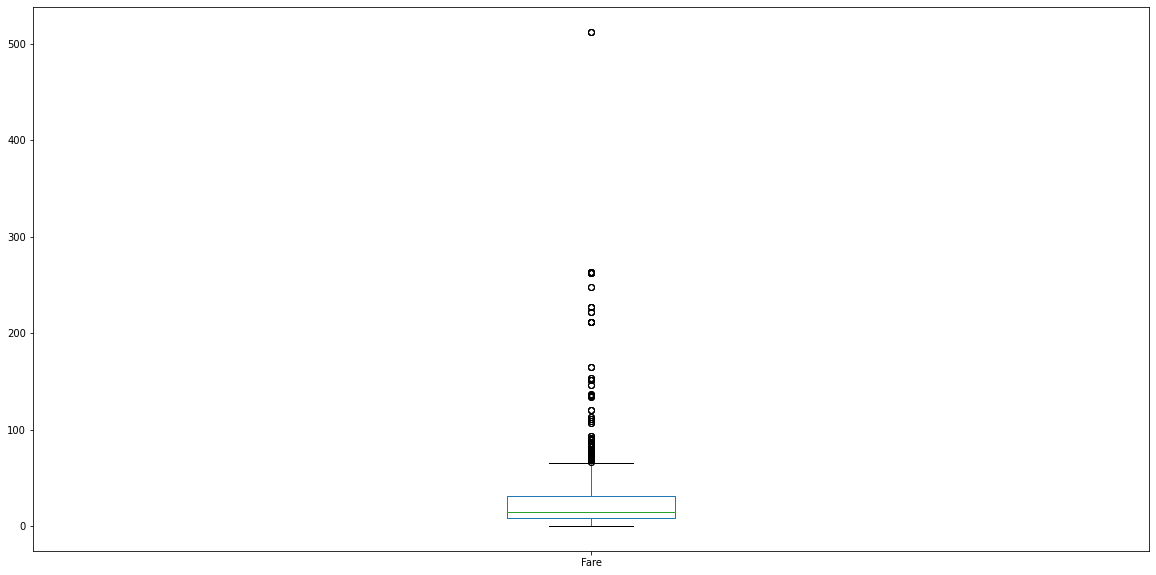

In [27]:
df.Fare.plot(kind='box')

Group And Aggregations

In [28]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,-283.301757,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,414.337413,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,-888.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,-888.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [29]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [30]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [31]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:title={'center':'Class wise passenger count'}>

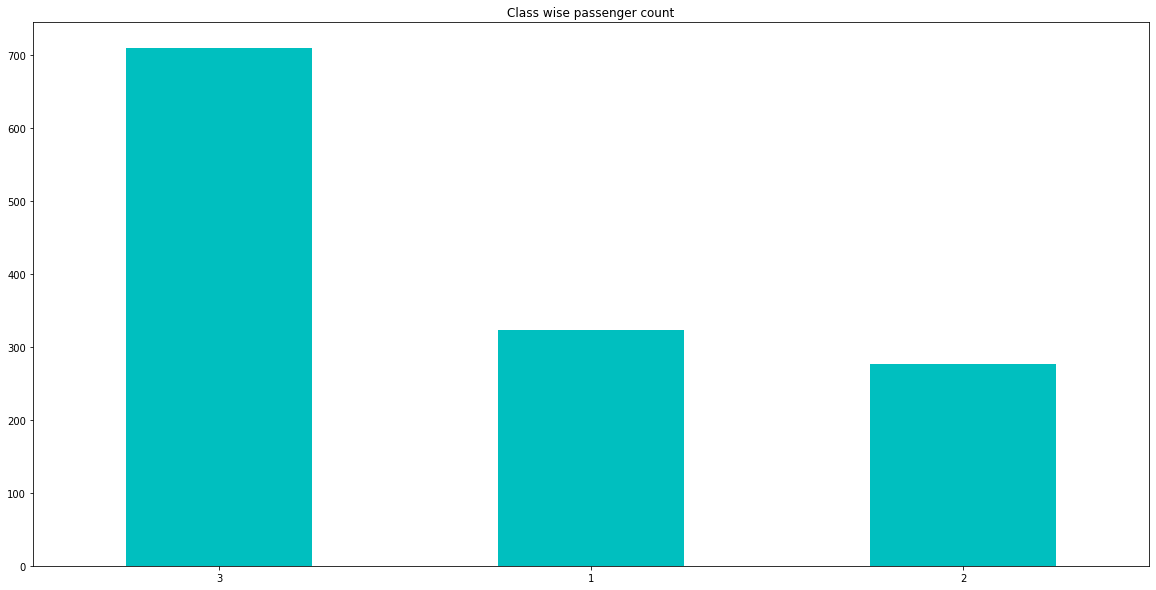

In [33]:
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class wise passenger count', color='c')

Distributions

<AxesSubplot:title={'center':'histogram for Age'}, ylabel='Frequency'>

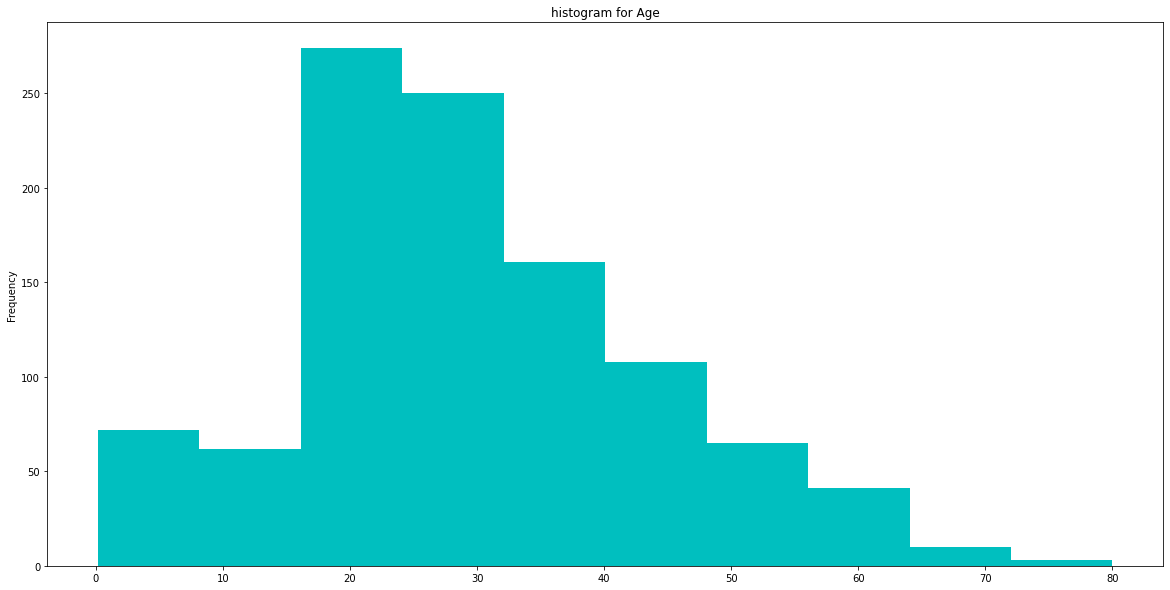

In [34]:
#use hist to create histogram
df.Age.plot(kind='hist',title='histogram for Age', color='c', )

<AxesSubplot:title={'center':'histogram for Age'}, ylabel='Frequency'>

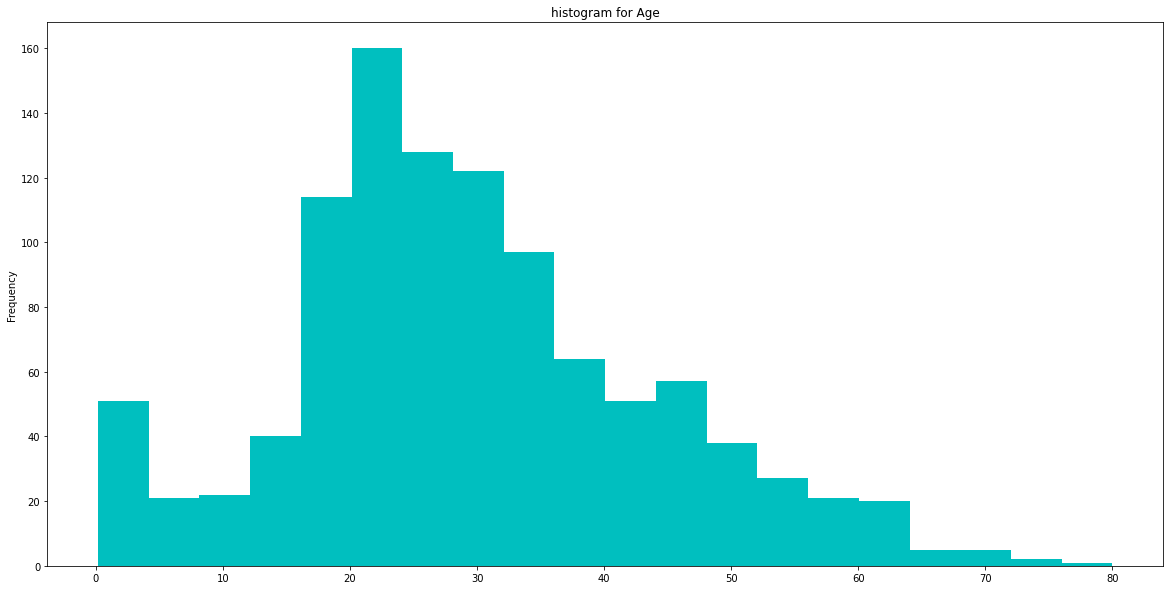

In [35]:
df.Age.plot(kind='hist',title='histogram for Age', color='c',bins=20 )


<AxesSubplot:title={'center':'histogram for Age'}, ylabel='Density'>

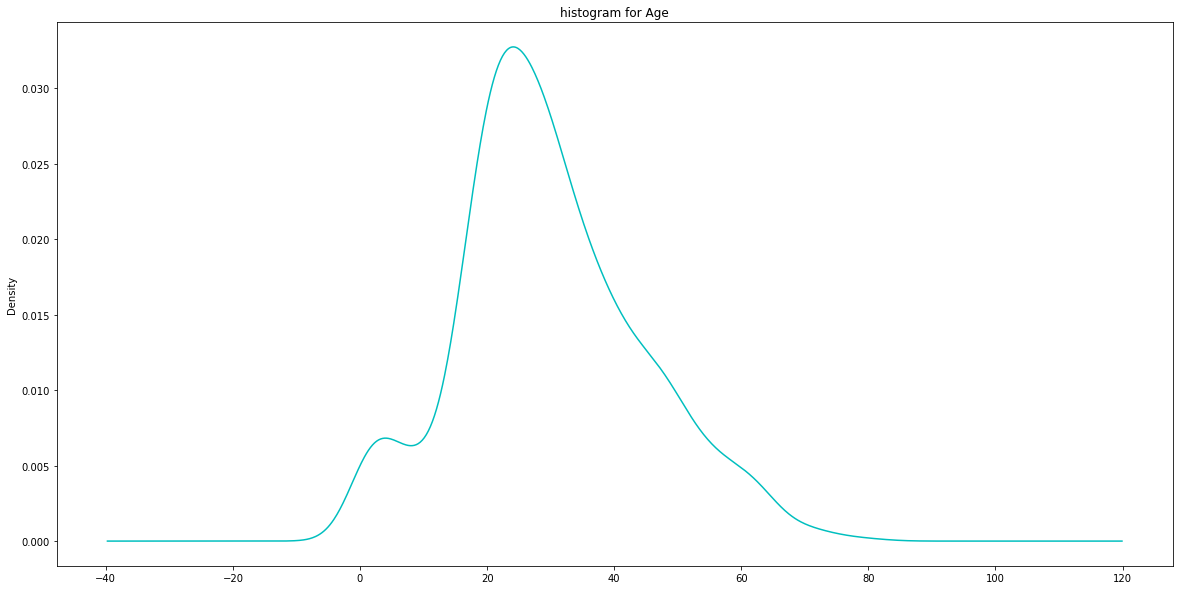

In [36]:
df.Age.plot(kind='kde',title='histogram for Age', color='c')

<AxesSubplot:title={'center':'histogram for Fare'}, ylabel='Frequency'>

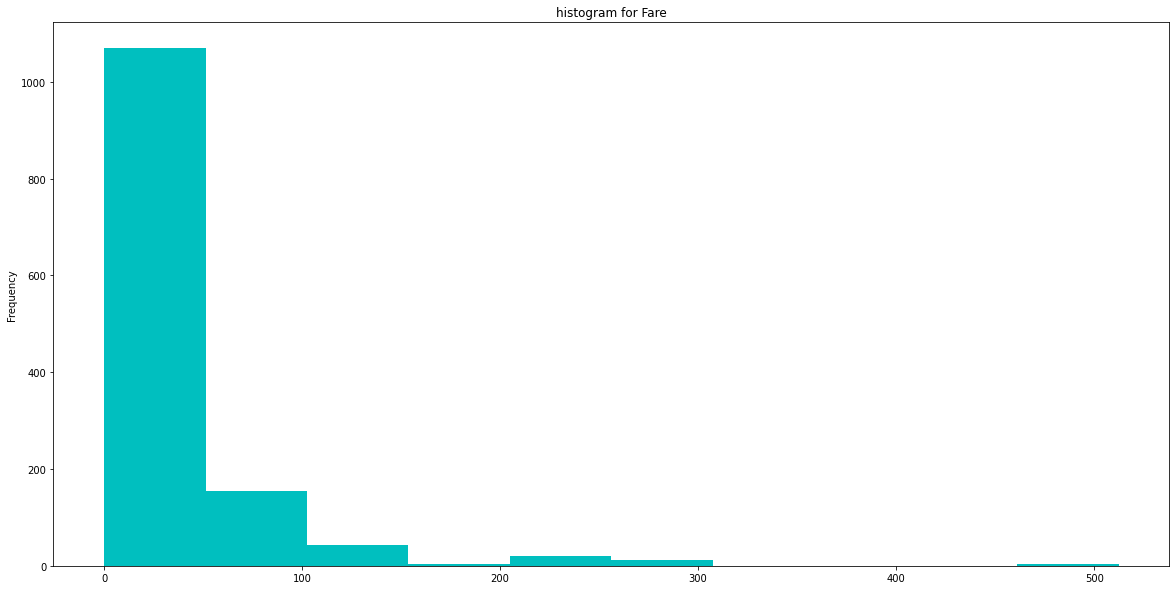

In [37]:
df.Fare.plot(kind='hist',title='histogram for Fare', color='c', )


In [38]:
print(f'skewness for age : {df.Age.skew()}')
print(f'skewness for Fare : {df.Fare.skew()}')

skewness for age : 0.40767455974362266
skewness for Fare : 4.367709134122922


<AxesSubplot:title={'center':'Scatter plot: Age vs Fare'}, xlabel='Age', ylabel='Fare'>

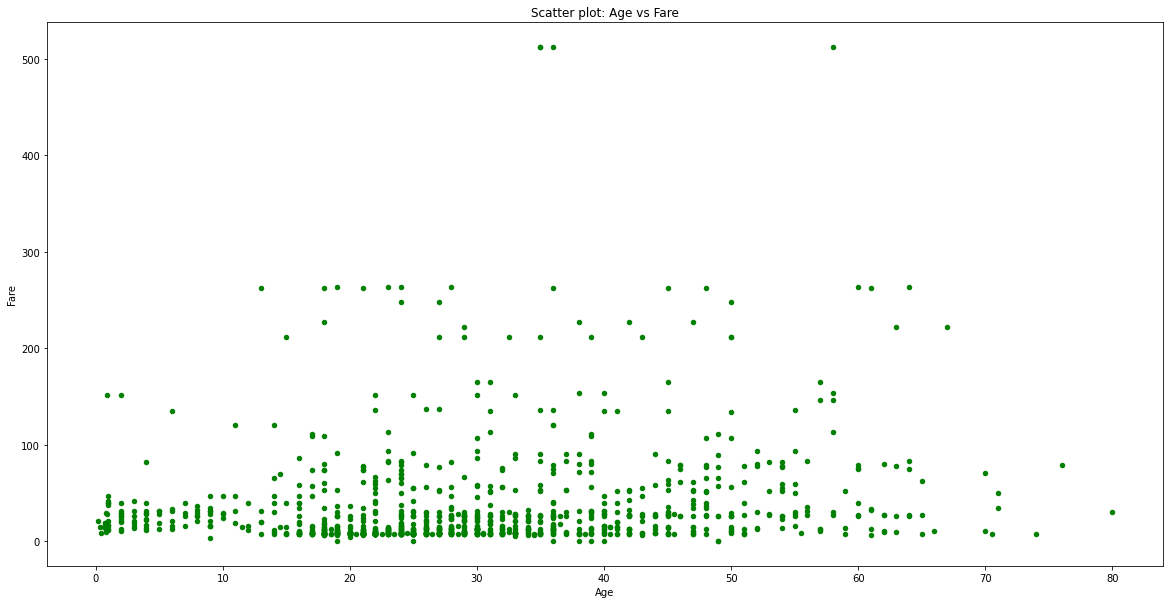

In [39]:
df.plot.scatter(x='Age', y='Fare', color='g',title='Scatter plot: Age vs Fare')

<AxesSubplot:title={'center':'Scatter plot: Age vs Fare'}, xlabel='Age', ylabel='Fare'>

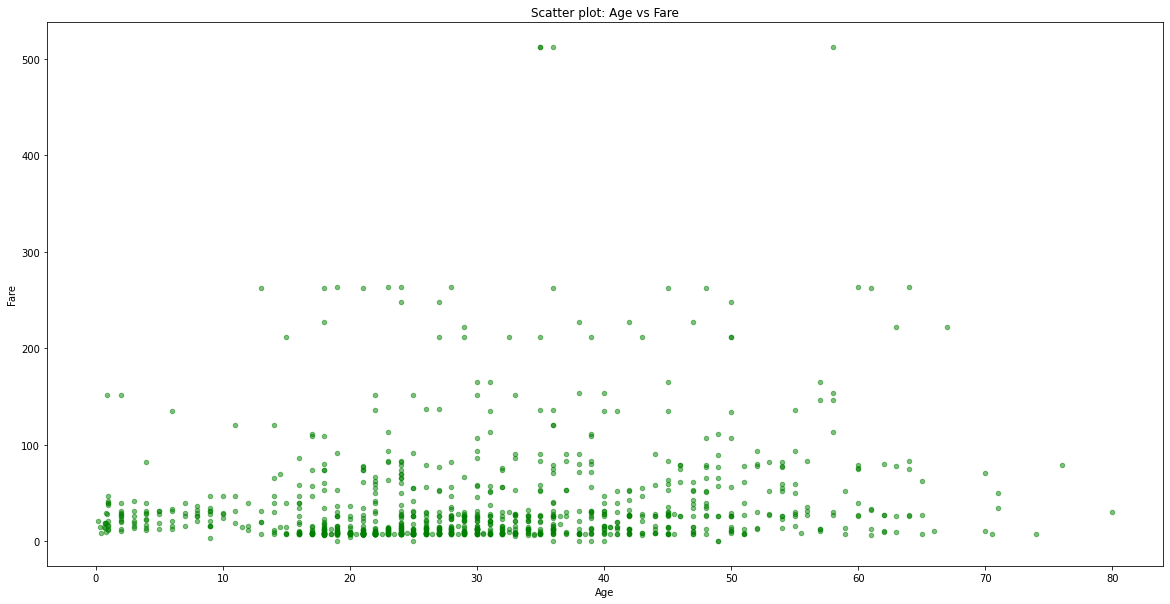

In [40]:
df.plot.scatter(x='Age', y='Fare', color='g',title='Scatter plot: Age vs Fare', alpha=0.5)

<AxesSubplot:title={'center':'Scatter plot: Age vs Fare'}, xlabel='Pclass', ylabel='Fare'>

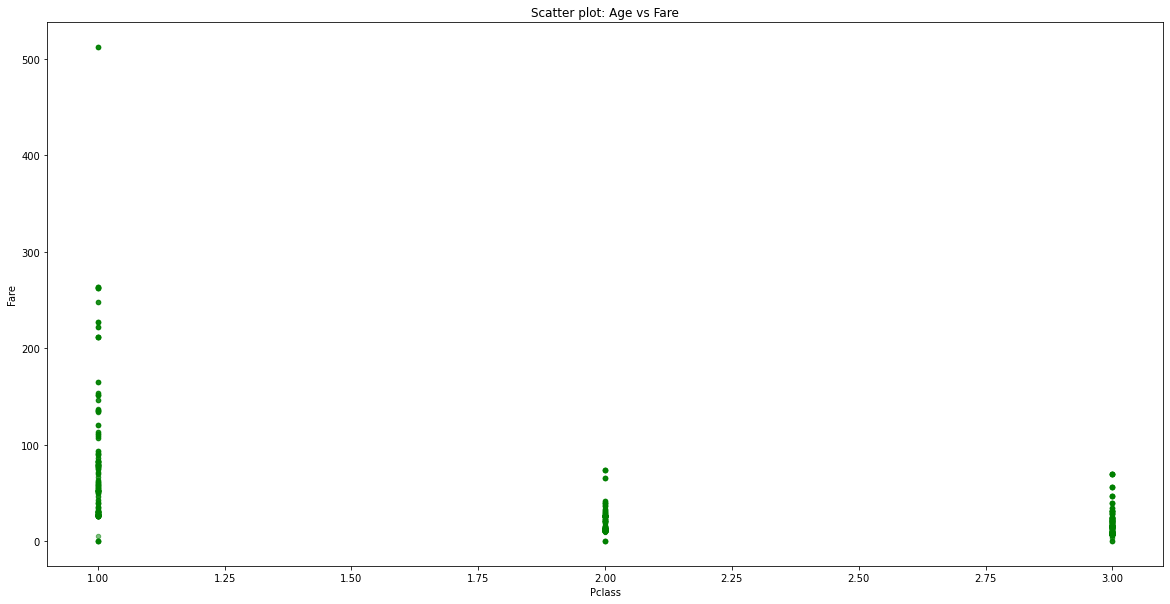

In [41]:
df.plot.scatter(x='Pclass', y='Fare', color='g',title='Scatter plot: Age vs Fare', alpha=0.5)

In [42]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [43]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [44]:
df.groupby(['Pclass'])['Fare','Age'].median()

<ipython-input-44-9e50b1515a06>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Pclass'])['Fare','Age'].median()


,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [45]:
df.groupby(['Pclass']).agg({'Fare':'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [46]:
aggregations = {
    'Fare':{
        'mean_fare':'mean',
        'median_fare':'median',
        'max_fare':max,
        'min_fare':np.min
    },
    'Age':{
        'mean_age':'mean',
        'median_age':'median',
        'max_age':max,
        'range_age':lambda x: max(x)-min(x)
    }
}

In [50]:
df.groupby(['Pclass']).agg(aggregations)

SpecificationError: nested renamer is not supported

In [51]:
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

Crosstabs

In [52]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


<AxesSubplot:xlabel='Sex'>

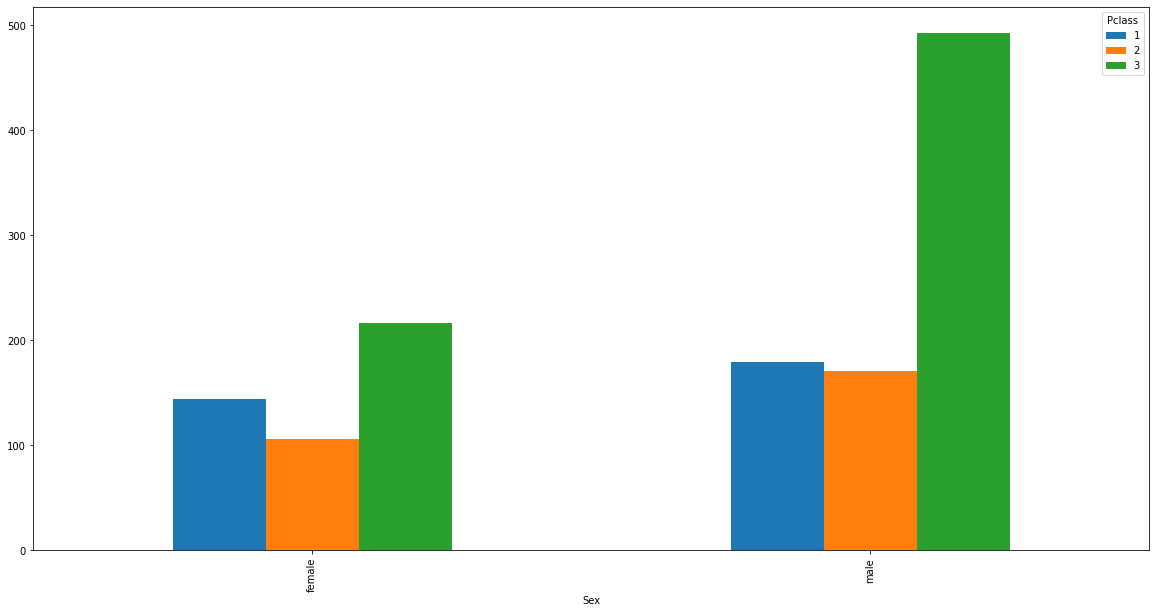

In [53]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar')

Pivot Table

In [54]:
df.pivot_table(index='Sex',columns='Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [55]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [56]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


Data Munging : Working with missing values

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB



Feature : Embarkrd

In [58]:
#extract row with embarked as null

df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [59]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [60]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [61]:
#impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S',inplace=True)

In [62]:
df.groupby(['Pclass','Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [63]:
#76.72 is close t0 80 which is the fare for both passenger havinng null embarked point
# So updating missing value to 'C' 

df.Embarked.fillna('C',inplace=True)

In [64]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


Feature: Fare

In [66]:
pd.options.display.max_rows=15

In [67]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [68]:
median_fare = df.loc[(df.Pclass== 3) & (df.Embarked == 'S'),'Fare'].median()
median_fare

8.05

In [69]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.Fare.fillna(median_fare,inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


Feature : Age

In [72]:
df[df.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1300,-888,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,-888,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,-888,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


option1 : replace  all missing age with mean value

<AxesSubplot:ylabel='Frequency'>

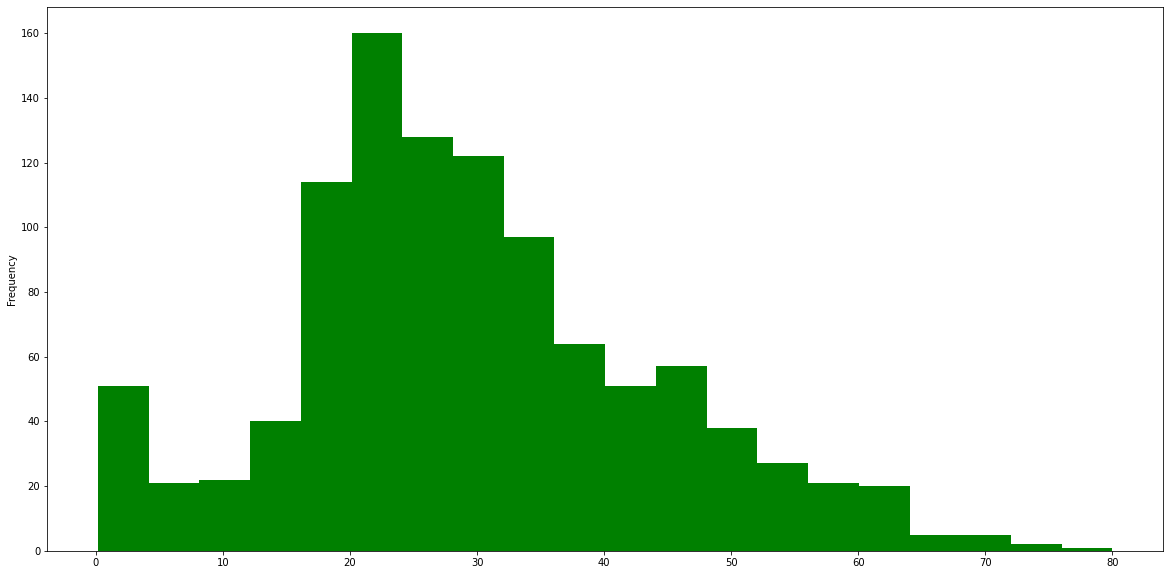

In [73]:
df.Age.plot(kind='hist',bins=20,color='g')

In [74]:
df.Age.mean()

29.881137667304014

Issue : due to few high values of 70's and 80's pushing the overall mean

In [75]:
#filling with mean value is not good since it will easily effect with extream value of age

# df.Age.fillna(df.Age.mean(), inplace=True)

option 2 : replace with median age of gender

In [76]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

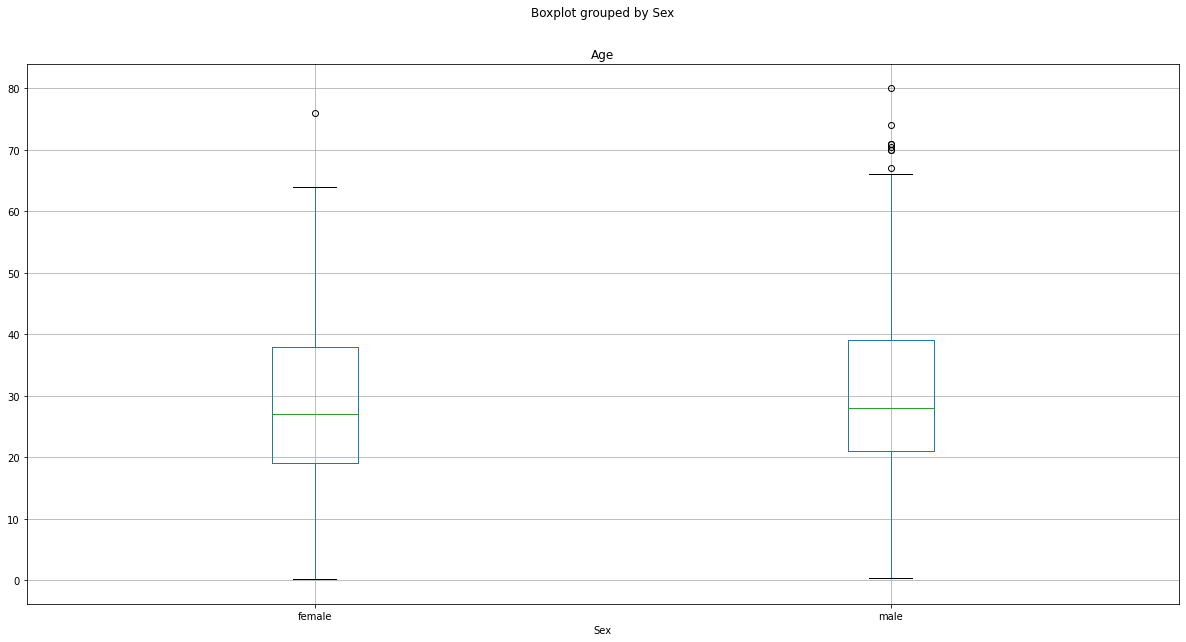

In [77]:
df[df.Age.notnull()].boxplot('Age','Sex')

In [78]:
#replace
# age_sex_median = df.groupby('Sex').Age.transform('median')
# print(age_sex_median)
# df.Age.fillna(age_sex_median, inplace=True)

option 3 : replace with median age of Pclass

<AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>

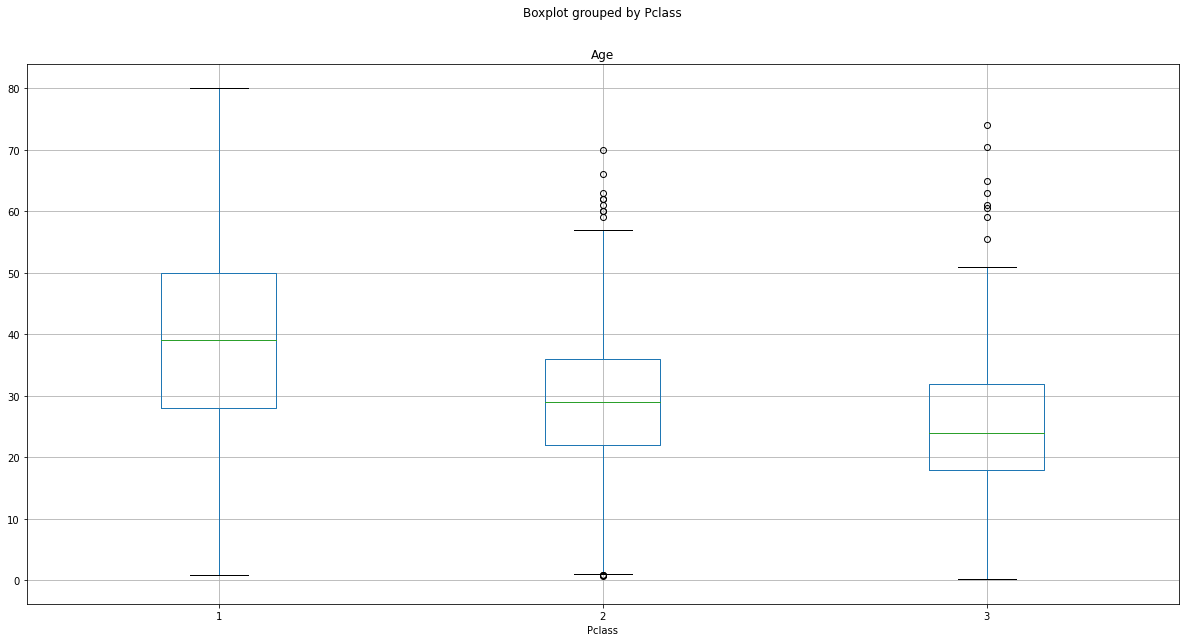

In [79]:
df[df.Age.notnull()].boxplot('Age','Pclass')

In [80]:
#replace :
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# print(pclass_age_median)
# df.Age.fillna(pclass_age_median, inplace=True)

option 4 : replace with median age of Title

In [81]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [82]:
#function to extract the title from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [83]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [84]:
#use map function tp apply the function on each Name value row i
df.Name.map(lambda x : GetTitle(x)) # df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [85]:
df.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [86]:
def get_title(name):
    title_group = {
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme' : 'Mrs',
        'ms' : 'Mrs',
        'major' : 'Officer',
        'lady' : 'Lady',
        'sir' : 'Sir',
        'mlle' : 'Miss',
        'col' : 'Officer',
        'capt' : 'Officer',
        'the countess' : 'Lady',
        'jonkheer' : 'Sir',
        'dona' : 'Lady',
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]


In [87]:
df['Title'] = df.Name.map(lambda x : get_title(x))

In [88]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


<AxesSubplot:title={'center':'Age'}, xlabel='Title'>

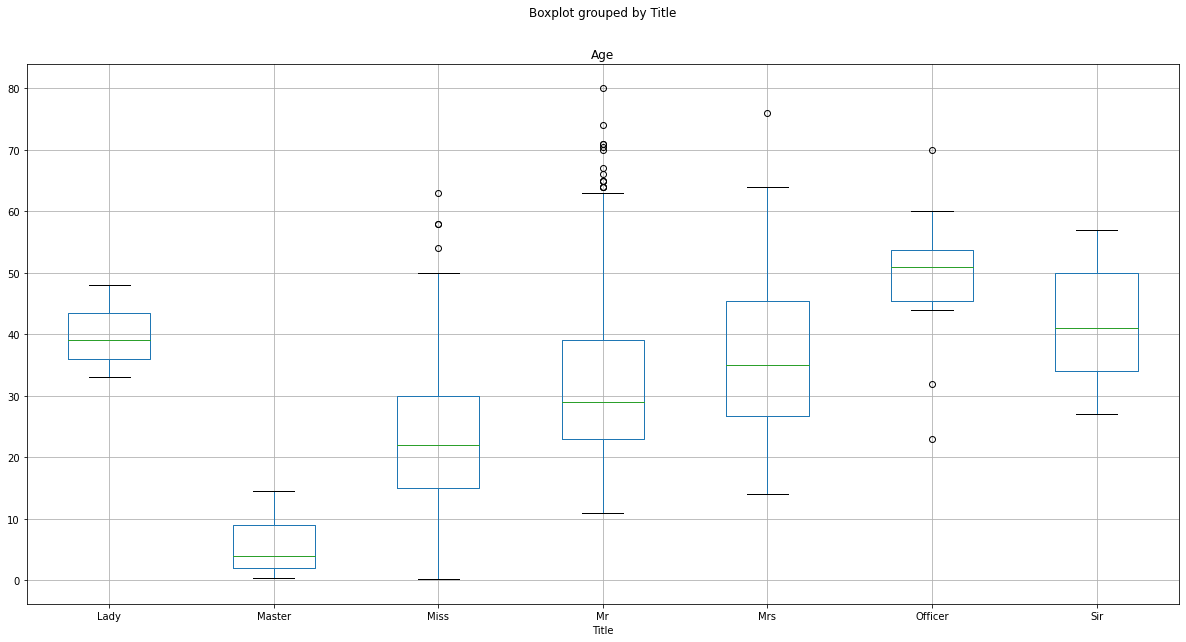

In [89]:
df[df.Age.notnull()].boxplot('Age','Title')

In [90]:
#replace missing valies
title_age_median = df.groupby('Title').Age.transform('median')
print(title_age_median)
df.Age.fillna(title_age_median, inplace=True)

PassengerId
1       29.0
2       35.0
3       22.0
4       35.0
5       29.0
        ... 
1305    29.0
1306    39.0
1307    29.0
1308    29.0
1309     4.0
Name: Age, Length: 1309, dtype: float64


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1309 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1309 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1309 non-null   object 
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 165.2+ KB


Working with Outliers

<AxesSubplot:ylabel='Frequency'>

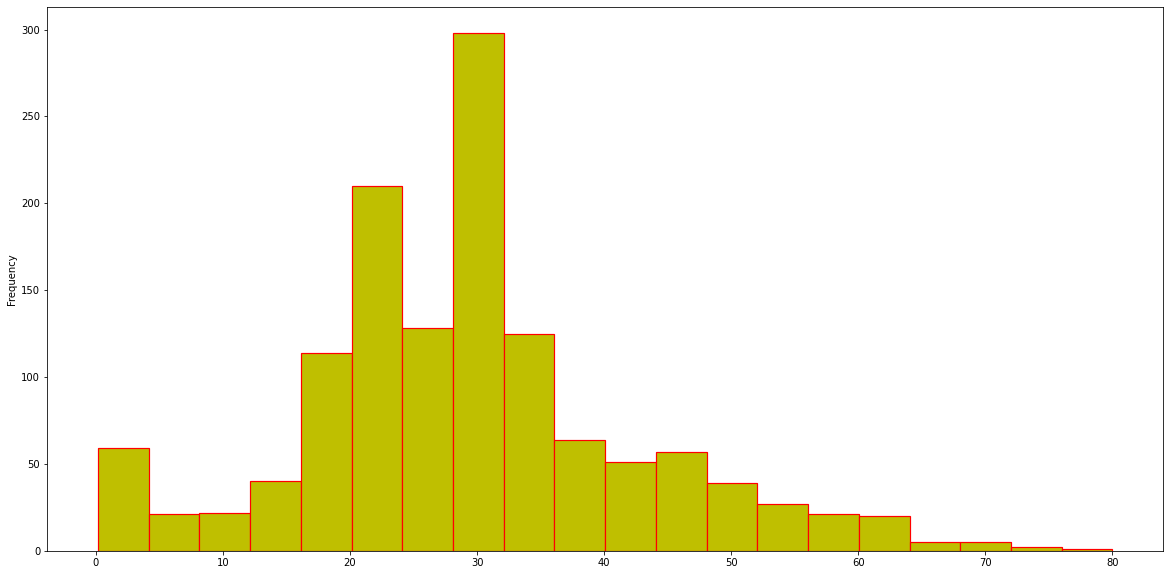

In [92]:
# use histogram to get and understand the dustributions
df.Age.plot(kind='hist', color='y', bins=20, linewidth=1.2, edgecolor='red')

In [93]:
df[df['Age'] > 70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr
988,-888,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Mrs


<AxesSubplot:ylabel='Frequency'>

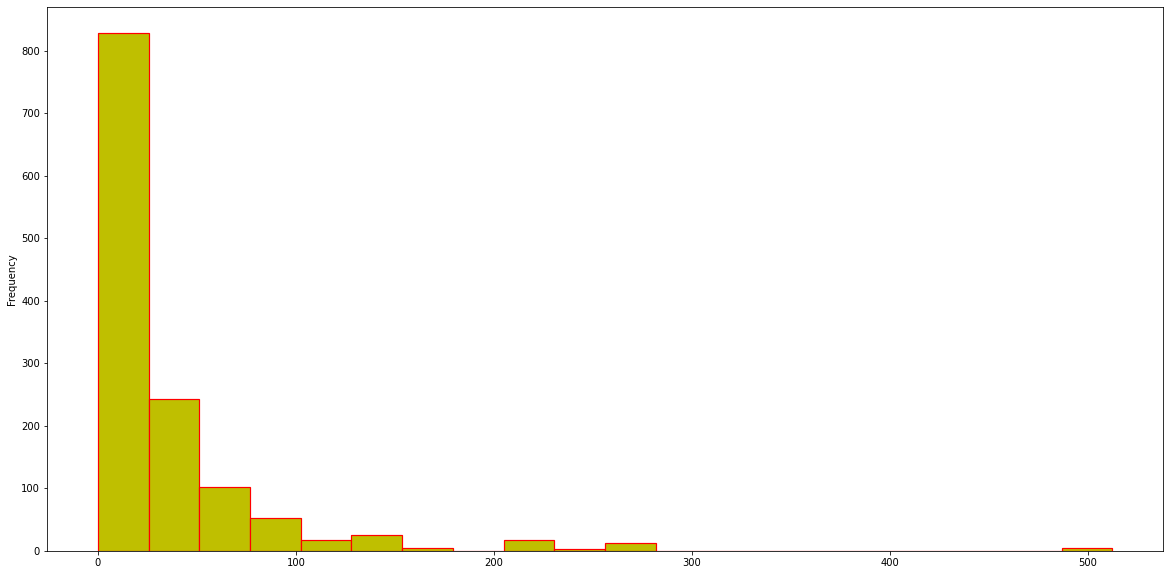

In [94]:
#histogram for fare
df.Fare.plot(kind = 'hist', color='y', bins=20, linewidth=1.2, edgecolor='red')

<AxesSubplot:>

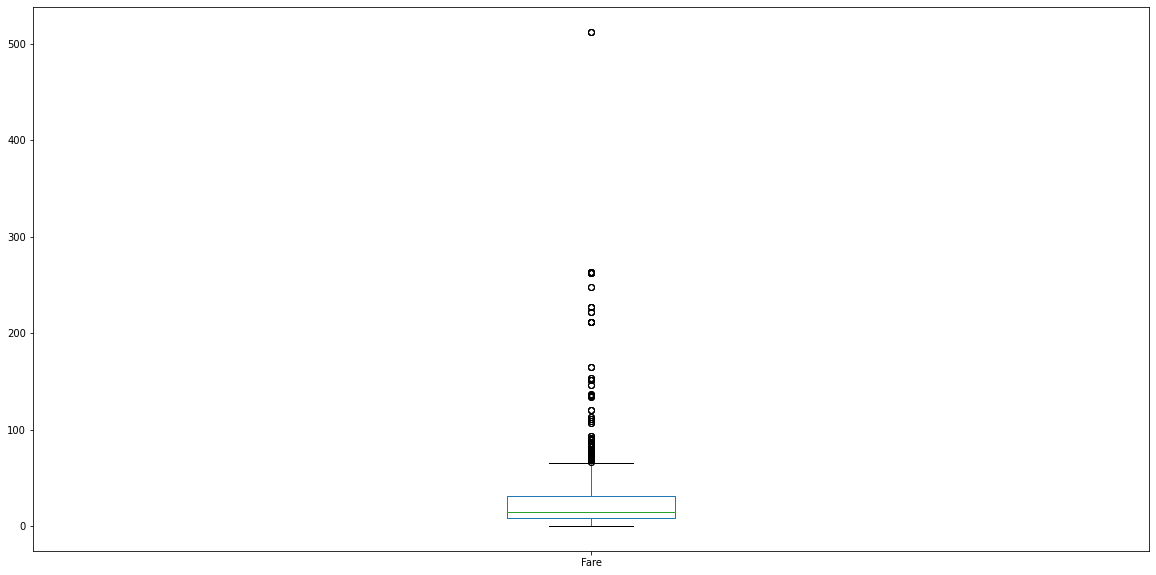

In [95]:
#box plot for fare
df.Fare.plot(kind = 'box')


In [96]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-888,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [97]:
# Try Some transformation to reduce the skewness

logfare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fare since log(0) is not defined

In [98]:
logfare

PassengerId
1       2.110213
2       4.280593
3       2.188856
4       3.990834
5       2.202765
          ...   
1305    2.202765
1306    4.699571
1307    2.110213
1308    2.202765
1309    3.150952
Name: Fare, Length: 1309, dtype: float64

<AxesSubplot:ylabel='Frequency'>

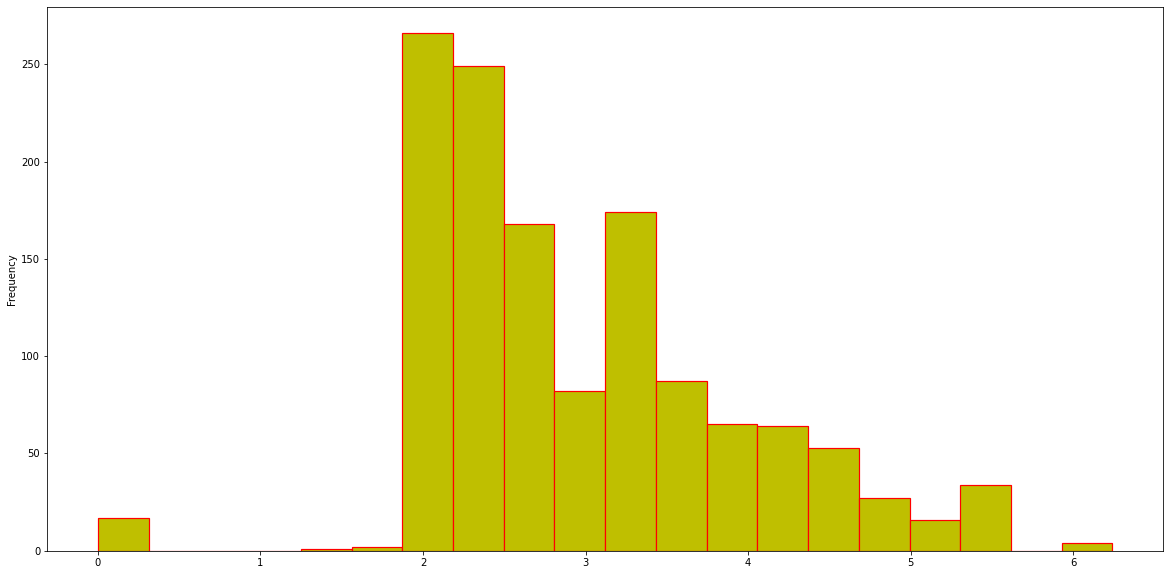

In [99]:
logfare.plot(kind='hist', color='y', bins=20, linewidth=1.2, edgecolor='red')

In [100]:
#binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [101]:
pd.qcut(df.Fare, 4, labels=['Very Low', 'Low', 'High', 'Very High'])

PassengerId
1        Very Low
2       Very High
3             Low
4       Very High
5             Low
          ...    
1305          Low
1306    Very High
1307     Very Low
1308          Low
1309         High
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

<AxesSubplot:>

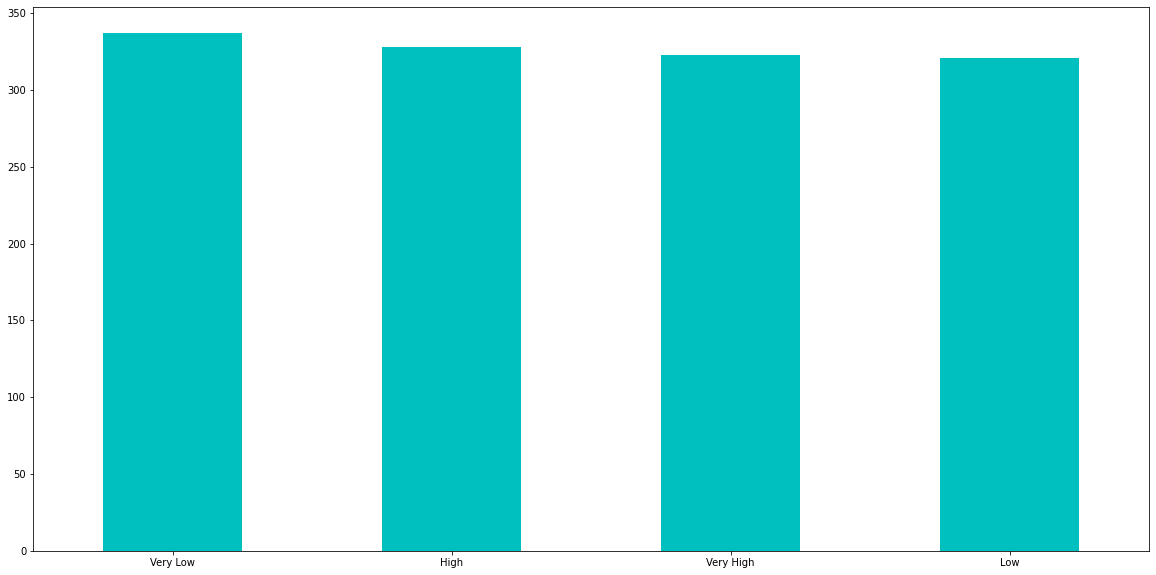

In [102]:
pd.qcut(df.Fare, 4, labels=['Very Low', 'Low', 'High', 'Very High']).value_counts().plot(kind='bar', color='c',rot='0')

In [103]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['Very Low', 'Low', 'High', 'Very High'])

In [104]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Very Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Low
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Very High
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Low


Feature Engineering

Feature : Age State (Adult or Child)

In [105]:
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [106]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Very Low,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very High,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Low,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Very High,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Low,Adult


In [107]:
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [108]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


Feature : FamilySize

In [109]:
df['FamilySize'] = df.Parch + df.SibSp + 1 # for self

<AxesSubplot:ylabel='Frequency'>

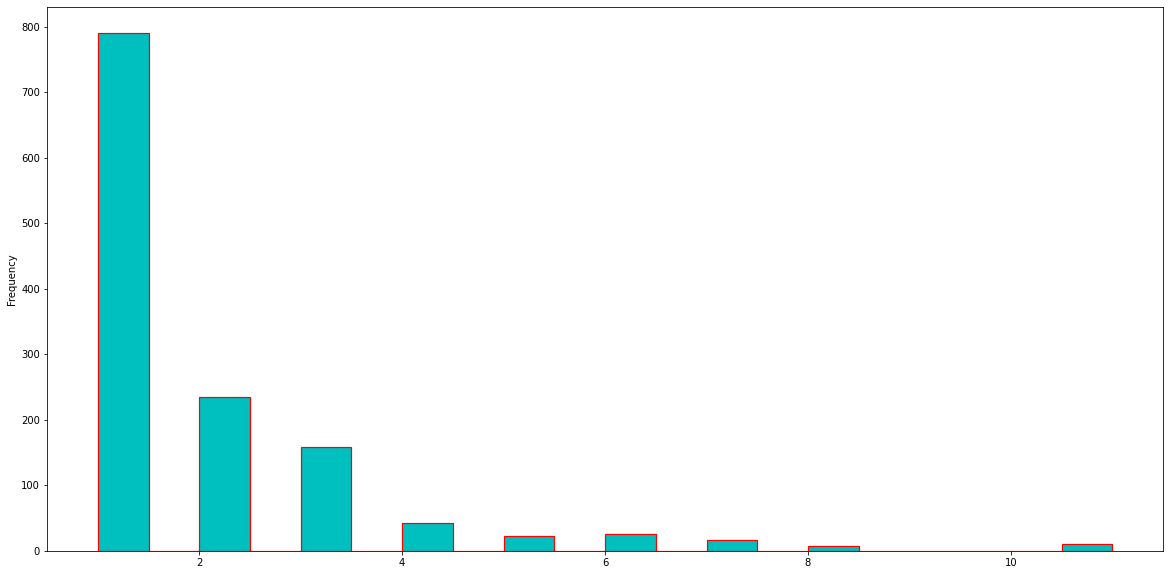

In [110]:
df['FamilySize'].plot(kind='hist', bins=20, color='c',linewidth=1.2, edgecolor='red')

In [111]:
df.loc[df.FamilySize == df.FamilySize.max(), ['Name','Survived', 'FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [112]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


Feature : IsMother

In [113]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [114]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


Deck

In [115]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [116]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [117]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Very Low,Adult,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very High,Adult,2,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Low,Adult,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Very High,Adult,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Low,Adult,1,0


In [118]:
df.loc[df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr,Very High,Adult,1,0


In [119]:
df.loc[df.Cabin == 'T','Cabin'] = np.NaN

In [120]:
df.loc[df.Cabin == 'T']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,


In [121]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [122]:
#extract first character of cabin string to the deck

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [123]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [124]:
pd.crosstab(df[df['Survived'] != -888].Survived, df[df['Survived'] != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1309 non-null   int64   
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1309 non-null   float64 
 9   Cabin       294 non-null    object  
 10  Embarked    1309 non-null   object  
 11  Title       1309 non-null   object  
 12  Fare_Bin    1309 non-null   category
 13  AgeState    1309 non-null   object  
 14  FamilySize  1309 non-null   int64   
 15  IsMother    1309 non-null   int32   
 16  Deck        1309 non-null   object  
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 202.5+ KB


Categorical Feature Encoding

In [126]:
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [127]:
df = pd.get_dummies(df,columns=['Deck','Pclass','Title','Fare_Bin','Embarked','AgeState'])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   FamilySize          1309 non-null   int64  
 10  IsMother            1309 non-null   int32  
 11  IsMale              1309 non-null   int32  
 12  Deck_A              1309 non-null   uint8  
 13  Deck_B              1309 non-null   uint8  
 14  Deck_C              1309 non-null   uint8  
 15  Deck_D              1309 non-null   uint8  
 16  Deck_E

Drop and Reorder Columns

In [129]:
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,...,Title_Sir,Fare_Bin_Very Low,Fare_Bin_Low,Fare_Bin_High,Fare_Bin_Very High,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,...,0,1,0,0,0,0,0,1,1,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,...,0,0,0,0,1,1,0,0,1,0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,...,0,0,1,0,0,0,0,1,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,...,0,0,0,0,1,0,0,1,1,0
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,...,0,0,1,0,0,0,0,1,1,0


In [130]:
df.drop(['Name','Sex','Ticket','Cabin','SibSp','Parch'], axis=1, inplace=True)

In [131]:
df.head()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_Very Low,Fare_Bin_Low,Fare_Bin_High,Fare_Bin_Very High,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [132]:
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Age                 1309 non-null   float64
 2   Fare                1309 non-null   float64
 3   FamilySize          1309 non-null   int64  
 4   IsMother            1309 non-null   int32  
 5   IsMale              1309 non-null   int32  
 6   Deck_A              1309 non-null   uint8  
 7   Deck_B              1309 non-null   uint8  
 8   Deck_C              1309 non-null   uint8  
 9   Deck_D              1309 non-null   uint8  
 10  Deck_E              1309 non-null   uint8  
 11  Deck_F              1309 non-null   uint8  
 12  Deck_G              1309 non-null   uint8  
 13  Deck_Z              1309 non-null   uint8  
 14  Pclass_1            1309 non-null   uint8  
 15  Pclass_2            1309 non-null   uint8  
 16  Pclass

In [134]:
df.head()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Deck_A,Deck_B,Deck_C,Deck_D,...,Title_Sir,Fare_Bin_Very Low,Fare_Bin_Low,Fare_Bin_High,Fare_Bin_Very High,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,1,38.0,71.2833,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
3,1,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1,35.0,53.1000,2,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
5,0,35.0,8.0500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


Save Process dataset

In [135]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [136]:
#train data
df.loc[df.Survived != -888].to_csv(write_train_path)
#test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888].to_csv(write_test_path)